In [1]:
import pandas as pd
import numpy as np
import scipy.stats

import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
ratings=pd.read_csv('data/preprocessed_user_item_rating.csv' )
ratings.head()

,Unnamed: 0,userid,artist-name,rating
0,0,user_001000,Wilco,5.0
1,1,user_001000,Radiohead,4.9
2,2,user_001000,Animal Collective,4.7
3,3,user_001000,Girl Talk,4.6
4,4,user_001000,Aesop Rock,4.2


In [3]:
# Number of users
print('The ratings dataset has', ratings['userid'].nunique(), 'unique users')

# Number of artists
print('The ratings dataset has', ratings['artist-name'].nunique(), 'unique artists')

# Number of ratings
print('The ratings dataset has', ratings['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(ratings['rating'].unique()))

The ratings dataset has 992 unique users
The ratings dataset has 36947 unique artists
The ratings dataset has 49 unique ratings
The unique ratings are [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]


In [4]:
agg_ratings = ratings.groupby('artist-name').agg(mean_rating = ('rating','mean'),
                                  number_of_ratings = ('rating','count')).reset_index().sort_values('number_of_ratings',  ascending=False)
agg_ratings.head()

,artist-name,mean_rating,number_of_ratings
24975,Radiohead,1.277399,469
30269,The Beatles,1.316489,376
6399,Coldplay,1.002011,348
31453,The Killers,0.861967,305
21550,Muse,0.963322,289


In [5]:
agg_ratings = agg_ratings[agg_ratings['number_of_ratings']>10]
agg_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 24975 to 15699
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   artist-name        2712 non-null   object 
 1   mean_rating        2712 non-null   float64
 2   number_of_ratings  2712 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 84.8+ KB


In [6]:
agg_ratings.sort_values(by = 'number_of_ratings', ascending=False).head()

,artist-name,mean_rating,number_of_ratings
24975,Radiohead,1.277399,469
30269,The Beatles,1.316489,376
6399,Coldplay,1.002011,348
31453,The Killers,0.861967,305
21550,Muse,0.963322,289


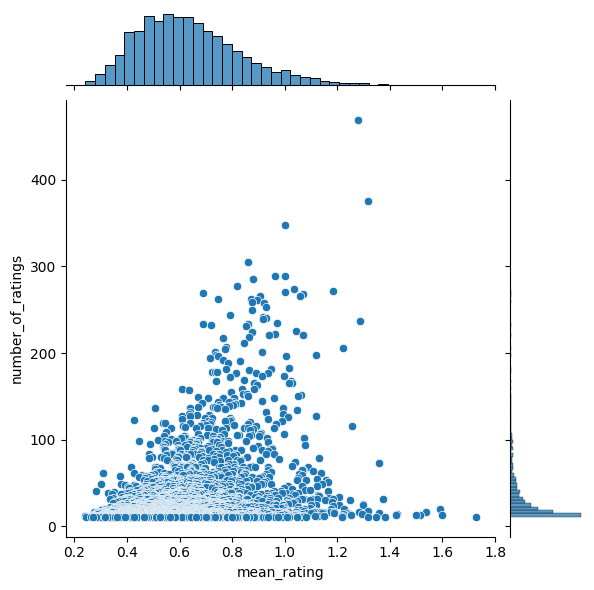

In [9]:
sns.jointplot(x='mean_rating',y='number_of_ratings', data = agg_ratings)

In [7]:
ratings_final = pd.merge(ratings, agg_ratings[['artist-name']], on= 'artist-name', how = 'inner')
ratings_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101827 entries, 0 to 101826
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   101827 non-null  int64  
 1   userid       101827 non-null  object 
 2   artist-name  101827 non-null  object 
 3   rating       101827 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.9+ MB


In [8]:
ratings_final.head()

,Unnamed: 0,userid,artist-name,rating
0,0,user_001000,Wilco,5.0
1,1793,user_000997,Wilco,0.2
2,15405,user_000974,Wilco,0.2
3,18996,user_000970,Wilco,0.7
4,22509,user_000965,Wilco,2.2


In [10]:
# Number of users
print('The ratings dataset has', ratings_final['userid'].nunique(), 'unique users')

# Number of artists
print('The ratings dataset has', ratings_final['artist-name'].nunique(), 'unique artists')

# Number of ratings
print('The ratings dataset has', ratings_final['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(ratings_final['rating'].unique()))

The ratings dataset has 991 unique users
The ratings dataset has 2712 unique artists
The ratings dataset has 49 unique ratings
The unique ratings are [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]


# User-movie matrix

In [11]:
matrix = ratings_final.pivot_table(index='userid',columns='artist-name',values='rating')
matrix.head()

artist-name,!!!,*Nsync,+44,...And You Will Know Us By The Trail Of Dead,"10,000 Maniacs",10Cc,12 Stones,1200 Micrograms,16 Horsepower,2 Many Dj'S,...,Пётр Ильич Чайковский,Сергей Васильевич Рахманинов,久石譲,坂本龍一,宇多田ヒカル,川井憲次,植松伸夫,浜崎あゆみ,菅野よう子,近藤浩治
userid,,,,,,,,,,,,,,,,,,,,,
user_000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
user_000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000004,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## normalize

In [12]:
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 0)
matrix_norm[543:].head()

artist-name,!!!,*Nsync,+44,...And You Will Know Us By The Trail Of Dead,"10,000 Maniacs",10Cc,12 Stones,1200 Micrograms,16 Horsepower,2 Many Dj'S,...,Пётр Ильич Чайковский,Сергей Васильевич Рахманинов,久石譲,坂本龍一,宇多田ヒカル,川井憲次,植松伸夫,浜崎あゆみ,菅野よう子,近藤浩治
userid,,,,,,,,,,,,,,,,,,,,,
user_000551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
matrix_norm.describe()

artist-name,!!!,*Nsync,+44,...And You Will Know Us By The Trail Of Dead,"10,000 Maniacs",10Cc,12 Stones,1200 Micrograms,16 Horsepower,2 Many Dj'S,...,Пётр Ильич Чайковский,Сергей Васильевич Рахманинов,久石譲,坂本龍一,宇多田ヒカル,川井憲次,植松伸夫,浜崎あゆみ,菅野よう子,近藤浩治
count,59.000000,16.000000,15.000000,68.000000,14.000000,19.000000,11.000000,12.000000,24.000000,21.000000,...,16.000000,16.000000,17.000000,26.000000,17.000000,13.000000,18.000000,16.000000,27.000000,11.000000
mean,-0.114724,-0.217561,-0.036257,0.008445,-0.113044,-0.156451,-0.118769,0.000797,-0.216395,0.273742,...,0.171699,0.067352,0.023580,-0.079791,0.499660,-0.208076,-0.069776,0.024826,0.146302,-0.292830
std,0.687847,0.299850,0.665735,0.680857,0.533631,0.342199,0.554683,0.726965,0.347422,1.222408,...,1.225830,1.194299,0.883233,0.900138,1.423481,0.628686,0.485792,0.770075,1.009288,0.269336
min,-0.776960,-0.618841,-0.595420,-0.787368,-0.763481,-0.548214,-0.876000,-1.400000,-0.876960,-0.540952,...,-0.661084,-0.661084,-1.061538,-0.730189,-0.535971,-0.918462,-0.811765,-0.702222,-0.908000,-0.758904
25%,-0.413773,-0.421391,-0.418956,-0.395712,-0.345939,-0.344689,-0.331813,-0.350522,-0.404150,-0.378378,...,-0.392512,-0.486400,-0.331579,-0.509379,-0.295833,-0.541026,-0.412368,-0.522768,-0.320606,-0.377217
50%,-0.266779,-0.304143,-0.216495,-0.210818,-0.309793,-0.256216,-0.179201,-0.153355,-0.304721,-0.221569,...,-0.294975,-0.332245,-0.224419,-0.357399,-0.093000,-0.407874,-0.106471,-0.262805,-0.173659,-0.350980
75%,-0.078450,-0.078125,0.100998,0.107074,-0.027889,-0.114857,-0.071805,0.334880,-0.141942,0.513889,...,0.030994,0.080121,0.136932,0.041582,0.623423,-0.082759,0.061247,0.300387,0.049519,-0.245000
max,4.121341,0.465556,2.048611,2.653039,1.091209,0.931716,1.178431,1.376271,0.783333,4.493220,...,3.529355,4.229355,3.017241,4.027273,4.264815,1.570833,0.963158,1.798529,3.014815,0.282353


# Identify similar users

## Pearsonmatrix_norm.T

In [81]:
user_similarity_pearson = matrix_norm.T.corr()
user_similarity_pearson.head()

userid,user_000001,user_000002,user_000003,user_000004,user_000005,user_000006,user_000007,user_000008,user_000009,user_000010,...,user_000991,user_000992,user_000993,user_000994,user_000995,user_000996,user_000997,user_000998,user_000999,user_001000
userid,,,,,,,,,,,,,,,,,,,,,
user_000001,1.000000,NaN,0.730336,0.407438,-0.225467,-0.981981,NaN,NaN,NaN,NaN,...,NaN,NaN,0.801310,NaN,NaN,-0.288880,NaN,1.000000,NaN,0.707868
user_000002,NaN,1.000000,0.054533,-0.378617,-0.258544,-0.202376,NaN,NaN,NaN,NaN,...,-0.460106,-0.300785,-0.201329,0.485264,0.159682,NaN,NaN,0.032819,-0.392173,0.180494
user_000003,0.730336,0.054533,1.000000,0.864076,-0.256889,0.039542,1.0,-1.0,0.770657,1.00000,...,0.012874,0.100209,-0.229349,0.421254,-0.087593,-0.055128,NaN,0.153685,0.098582,0.276399
user_000004,0.407438,-0.378617,0.864076,1.000000,-0.135884,0.806642,-1.0,NaN,NaN,NaN,...,-0.428843,0.803195,0.192130,0.464811,-0.073701,0.973871,NaN,0.813832,-0.247121,0.668424
user_000005,-0.225467,-0.258544,-0.256889,-0.135884,1.000000,NaN,NaN,NaN,NaN,0.48413,...,-1.000000,NaN,0.148821,-0.341779,-1.000000,-0.474601,NaN,-1.000000,NaN,NaN


## Cosine

In [19]:
columns = list(user_similarity_pearson.columns)
user_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
user_similarity_cosine

array([[ 1.        , -0.00560126,  0.00594583, ...,  0.04323586,
         0.00523811,  0.0298281 ],
       [-0.00560126,  1.        ,  0.00980501, ...,  0.03554343,
        -0.03792094,  0.0198436 ],
       [ 0.00594583,  0.00980501,  1.        , ...,  0.03305887,
         0.01271882,  0.0277108 ],
       ...,
       [ 0.04323586,  0.03554343,  0.03305887, ...,  1.        ,
         0.03314648,  0.25281864],
       [ 0.00523811, -0.03792094,  0.01271882, ...,  0.03314648,
         1.        , -0.00462353],
       [ 0.0298281 ,  0.0198436 ,  0.0277108 , ...,  0.25281864,
        -0.00462353,  1.        ]])

## Jaccard

In [21]:
from sklearn.metrics.pairwise import pairwise_distances
jac_sim = pairwise_distances(matrix_norm.fillna(0), metric = "hamming") # 1 - hamming = jaccard disimilarity
# optionally convert it to a DataFrame
jac_sim = pd.DataFrame(jac_sim, index=columns, columns=columns)
jac_sim.head()

,user_000001,user_000002,user_000003,user_000004,user_000005,user_000006,user_000007,user_000008,user_000009,user_000010,...,user_000991,user_000992,user_000993,user_000994,user_000995,user_000996,user_000997,user_000998,user_000999,user_001000
user_000001,0.000000,0.074115,0.061209,0.077802,0.027655,0.036504,0.026549,0.017330,0.030973,0.023599,...,0.033186,0.029867,0.061209,0.043879,0.040560,0.025811,0.019912,0.047935,0.032817,0.064528
user_000002,0.074115,0.000000,0.096608,0.114676,0.070059,0.076327,0.068584,0.058997,0.072271,0.065265,...,0.074115,0.068584,0.092183,0.079277,0.076696,0.068215,0.060841,0.077065,0.069690,0.099926
user_000003,0.061209,0.096608,0.000000,0.105088,0.057891,0.064528,0.056047,0.046460,0.058997,0.052360,...,0.060103,0.057522,0.085546,0.070428,0.067478,0.053835,0.049779,0.075959,0.058628,0.091445
user_000004,0.077802,0.114676,0.105088,0.000000,0.075590,0.083333,0.073378,0.064528,0.077802,0.070796,...,0.079646,0.074853,0.096239,0.088864,0.083333,0.070428,0.066372,0.088864,0.078909,0.102876
user_000005,0.027655,0.070059,0.057891,0.075590,0.000000,0.033186,0.023968,0.014749,0.028024,0.019912,...,0.030236,0.026917,0.058260,0.039086,0.037611,0.022493,0.017330,0.045354,0.030236,0.064159


# prediction

## Find similar users

In [82]:
userid ='user_000001'
user_similarity_pearson.drop(index=userid, inplace=True)
user_similarity_pearson.head()

userid,user_000001,user_000002,user_000003,user_000004,user_000005,user_000006,user_000007,user_000008,user_000009,user_000010,...,user_000991,user_000992,user_000993,user_000994,user_000995,user_000996,user_000997,user_000998,user_000999,user_001000
userid,,,,,,,,,,,,,,,,,,,,,
user_000002,NaN,1.000000,0.054533,-0.378617,-0.258544,-0.202376,NaN,NaN,NaN,NaN,...,-0.460106,-0.300785,-0.201329,0.485264,0.159682,NaN,NaN,0.032819,-0.392173,0.180494
user_000003,0.730336,0.054533,1.000000,0.864076,-0.256889,0.039542,1.0,-1.0,0.770657,1.00000,...,0.012874,0.100209,-0.229349,0.421254,-0.087593,-0.055128,NaN,0.153685,0.098582,0.276399
user_000004,0.407438,-0.378617,0.864076,1.000000,-0.135884,0.806642,-1.0,NaN,NaN,NaN,...,-0.428843,0.803195,0.192130,0.464811,-0.073701,0.973871,NaN,0.813832,-0.247121,0.668424
user_000005,-0.225467,-0.258544,-0.256889,-0.135884,1.000000,NaN,NaN,NaN,NaN,0.48413,...,-1.000000,NaN,0.148821,-0.341779,-1.000000,-0.474601,NaN,-1.000000,NaN,NaN
user_000006,-0.981981,-0.202376,0.039542,0.806642,NaN,1.000000,NaN,NaN,NaN,NaN,...,0.872592,0.999760,-0.197771,-0.331786,0.009382,1.000000,NaN,0.133678,0.986729,0.861618


In [83]:
n=5
user_similarity_threshold = 0.4
similar_users = user_similarity_pearson[user_similarity_pearson[userid]>user_similarity_threshold][userid]
print(similar_users)

userid
user_000003    0.730336
user_000004    0.407438
user_000018    1.000000
user_000019    0.779673
user_000022    1.000000
                 ...   
user_000982    0.756188
user_000987    1.000000
user_000993    0.801310
user_000998    1.000000
user_001000    0.707868
Name: user_000001, Length: 184, dtype: float64


In [84]:
# delete songs already lsitened by the user
listened_artists = matrix_norm[matrix_norm.index == userid].dropna(axis=1,how='all')
listened_artists

artist-name,4Hero,Aphex Twin,Björk,Boards Of Canada,Bugge Wesseltoft,Burial,Clark,Coldplay,Cornelius,Deadbeat,...,Seal,Squarepusher,Steve Reich,The Black Dog,The Cinematic Orchestra,The Verve,To Rococo Rot,Underworld,Us3,坂本龍一
userid,,,,,,,,,,,,,,,,,,,,,
user_000001,-0.072727,-0.772727,1.627273,0.127273,-0.372727,-0.572727,0.627273,-0.772727,2.027273,-0.772727,...,-0.772727,-0.072727,-0.172727,-0.072727,0.627273,-0.672727,-0.772727,3.627273,-0.772727,4.027273


In [89]:
similar_user_artists = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_artists

artist-name,!!!,+44,...And You Will Know Us By The Trail Of Dead,"10,000 Maniacs",10Cc,12 Stones,1200 Micrograms,16 Horsepower,2 Many Dj'S,2 Unlimited,...,Пётр Ильич Чайковский,Сергей Васильевич Рахманинов,久石譲,坂本龍一,宇多田ヒカル,川井憲次,植松伸夫,浜崎あゆみ,菅野よう子,近藤浩治
userid,,,,,,,,,,,,,,,,,,,,,
user_000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000004,-0.080814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_000982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
similar_user_artists.drop(listened_artists.columns,axis=1,inplace=True,errors='ignore')

In [91]:
similar_user_artists

artist-name,!!!,+44,...And You Will Know Us By The Trail Of Dead,"10,000 Maniacs",10Cc,12 Stones,1200 Micrograms,16 Horsepower,2 Many Dj'S,2 Unlimited,...,Μ-Ziq,Пётр Ильич Чайковский,Сергей Васильевич Рахманинов,久石譲,宇多田ヒカル,川井憲次,植松伸夫,浜崎あゆみ,菅野よう子,近藤浩治
userid,,,,,,,,,,,,,,,,,,,,,
user_000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000004,-0.080814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_000982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_000993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Recommend items

In [112]:
similar_user_artists['!!!']['user_000004']

-0.08081395348837211

In [93]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_artists.columns:
  # Get the ratings for artist i
  artist_rating = similar_user_artists[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the artist has rating
    if pd.isna(artist_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the artist rating
      score = similar_users[u] * artist_rating[u]
      # Add the score to the total score for the artist so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['artis-name', 'artist_score'])
    
# Sort the movies by score
ranked_item_score = item_score.sort_values(by='artist_score', ascending=False)

# Select top m artists
m = 10
ranked_item_score.head(m)

,artis-name,artist_score
1482,Mugison,4.229032
2413,"Up, Bustle & Out",2.677684
2408,Ulver,2.264236
217,Bbc Radio 4,2.214747
1414,Micatone,2.151048
128,Annuals,2.043646
146,Arcana,2.027703
1886,Soda Stereo,2.025573
2054,The Birthday Massacre,1.627595
798,Finntroll,1.551815


# predict scores

In [114]:
# Average rating for the picked user
avg_rating = matrix[matrix.index == userid].T.mean()[userid]

# Print the average artist rating for user 1
print(f'The average artist rating for user {userid} is {avg_rating:.2f}')

The average artist rating for user user_000001 is 0.97


In [98]:
# Calcuate the predicted rating
ranked_item_score['predicted_rating'] = ranked_item_score['artist_score'] + avg_rating

# Take a look at the data
ranked_item_score.head(m)

,artis-name,artist_score,predicted_rating
1482,Mugison,4.229032,5.201760
2413,"Up, Bustle & Out",2.677684,3.650412
2408,Ulver,2.264236,3.236963
217,Bbc Radio 4,2.214747,3.187474
1414,Micatone,2.151048,3.123775
128,Annuals,2.043646,3.016374
146,Arcana,2.027703,3.000430
1886,Soda Stereo,2.025573,2.998300
2054,The Birthday Massacre,1.627595,2.600322
798,Finntroll,1.551815,2.524542


In [113]:
ranked_item_score.describe()

,artist_score,predicted_rating
count,2518.000000,2518.000000
mean,-0.075826,0.896901
std,0.304535,0.304535
min,-0.887781,0.084947
25%,-0.249380,0.723347
50%,-0.135637,0.837090
75%,0.039476,1.012203
max,4.229032,5.201760
